In [6]:
import cv2
import numpy as np
import time
import matplotlib.pyplot as plt
from skimage.exposure import rescale_intensity

## part 1

In [50]:
def averaging(image , k):

    iH, iW = image.shape[:2]
    
    kernel = np.ones((k,k), dtype='float')
    
    kernel = kernel/(k**2)
    pad = (k-1) // 2

    image = cv2.copyMakeBorder(image, pad, pad, pad, pad, cv2.BORDER_REPLICATE)
    output = np.zeros((iH, iW), dtype="float32")

    for y in np.arange(pad, iH + pad):
        for x in np.arange(pad, iW + pad):
            roi = image[y - pad: pad + y + 1, x - pad:pad + x + 1]
            c = (roi * kernel).sum()
            output[y-pad, x-pad] = c

    output = rescale_intensity(output, in_range=(0, 255))
    output = (output * 255).astype("uint8")
    return output 

In [53]:
orig = cv2.imread("../input_data/barbara.jpg",0)
k = 5
new = averaging(orig,k)

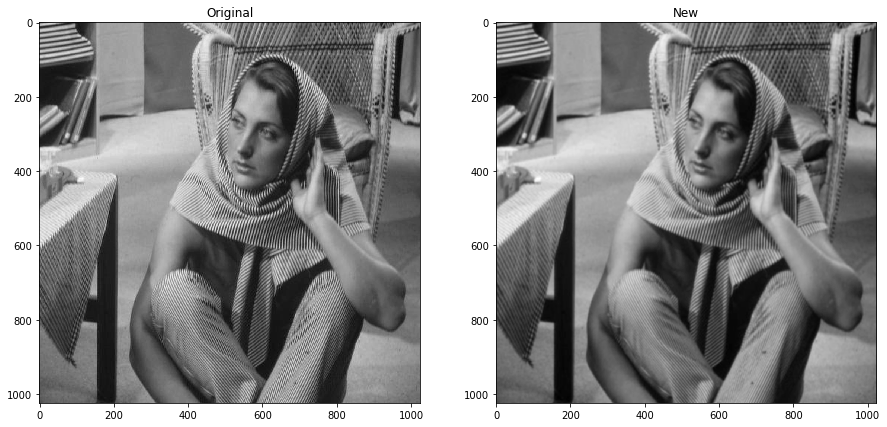

In [54]:
fig, axs = plt.subplots(2,3,figsize=(15,15))

plt.subplot(1,2,1)
plt.imshow(orig,'gray')
plt.title("Original")
plt.subplot(1,2,2)
plt.imshow(new,'gray')
plt.title("New")
plt.show()

## part 2

In [7]:
def efficientLowPass(image,k):
    kernel = np.ones((k,k))/(k**2)
    iH, iW = image.shape[:2]

    pad = (k-1) // 2

    image = cv2.copyMakeBorder(image, pad, pad, pad, pad, cv2.BORDER_REPLICATE)
    output = np.zeros((iH, iW), dtype="float32")

    start = time.time()
    for y in np.arange(pad, iH + pad):
        for x in np.arange(pad, iW + pad):
            roi = image[y - pad: pad + y + 1, x - pad:pad + x + 1]
            c = (roi * kernel).sum()
            output[y-pad, x-pad] = c
    end = time.time()
    output = rescale_intensity(output, in_range=(0, 255))
    output = (output * 255).astype("uint8")
    t = end - start
    return t, output

In [8]:
def non_efficient_lowpass(im,k):
    w,h = im.shape
    filtered_im = np.zeros((w,h))
    fil = np.ones((k,k))/k**2
    start = time.time()
    for i in range(k//2,w-k//2):
        for j in range(k//2,h-k//2):
            filtered_im[i,j] = np.sum(fil*im[i-k//2:i+k//2 +1,j-k//2:j+k//2 + 1])

    end = time.time()
    t = end -start
    return t, filtered_im

In [9]:
im = cv2.imread("../input_data/barbara.jpg",0)
efficientBarb = []
nonBarb = []
# t1, im1 = efficientLowPass(im,7)
# t2, im2 = non_efficient_lowpass(im,7)

for i in range(1,21,2):
    t1,im1 = efficientLowPass(im,i)
    t2, im2 = non_efficient_lowpass(im,i)
    efficientBarb.append(t1)
    nonBarb.append(t2)



In [10]:
im = cv2.imread("../input_data/bell.jpg",0)
efficientBell = []
nonBell = []

for i in range(1,21,2):
    t1,im1 = efficientLowPass(im,i)
    t2, im2 = non_efficient_lowpass(im,i)
    efficientBell.append(t1)
    nonBell.append(t2)

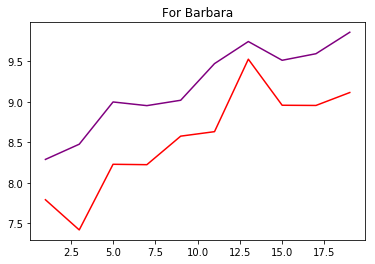

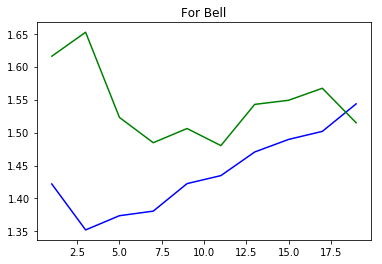

In [16]:
x = range(1,21,2)
fig = plt.figure()
plt.plot(x,efficientBarb,c='red')
plt.plot(x,nonBarb,c='purple')
plt.title("For Barbara")
plt.show()
fig2 = plt.figure()
plt.plot(x,efficientBell,c='blue')
plt.plot(x,nonBell,c='green')
plt.title("For Bell")
plt.show()

## part 3

In [34]:
def med1(im,k):
    temp = []
    w = im.shape[0]
    h = im.shape[1]
    
    ind = k//2
    final = np.zeros((w,h))
    start = time.time()
    
    for i in range(w):
        for j in range(h):
            for m in range(k):
                
                if((i+m-ind) < 0) or ((i+m-ind)>(w-1)):
                    for p in range(k):
                        temp.append(0)
                
                else:
                    if((j+m-ind)<0) or ((j+ind)>(h-1)):
                        temp.append(0)
                    else:
                        for q in range(k):
                            temp.append(im[i+m-ind][j+q-ind])
                            
            temp.sort()
            final[i][j] = temp[len(temp)//2]
            temp = []
    end = time.time()
#     print(end - start)
    diff = end - start
    return diff,final
                            
    
    

In [35]:
def med2(im,k):
    img = im
    h = im.shape[0]
    l = im.shape[1]
    start = time.time()
    for i in range(k,h-k):
        for j in range(k,l-k):
            block = im[i-k:i+k+1,j-k:j+k+1]
            m = np.median(block)
            img[i][j] = int(m)
    end = time.time()
#     print(end-start)
    diff = end-start
    return diff, img

In [28]:
deg = cv2.imread("../input_data/Degraded.jpg",0)
_,new = med1(deg,3)

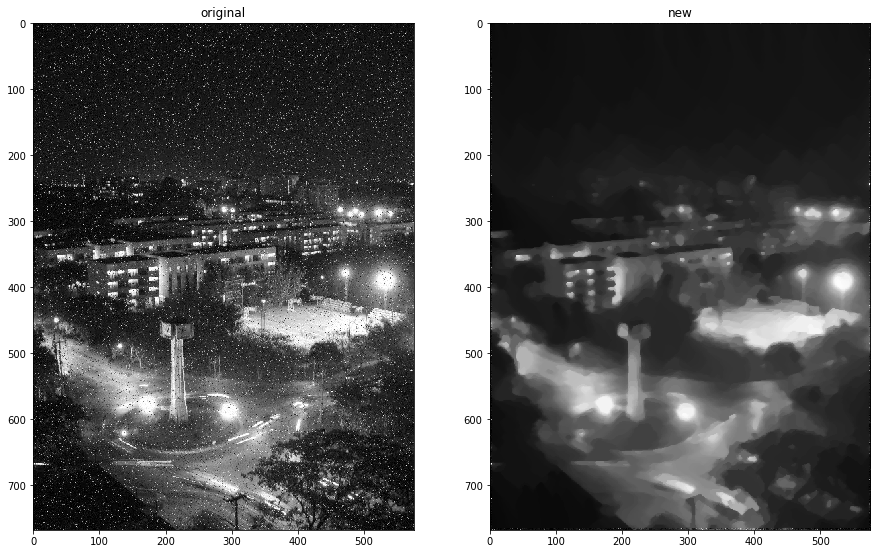

In [30]:
deg = cv2.imread("../input_data/Degraded.jpg",0)
fig, axs = plt.subplots(2,3,figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(deg,'gray')
plt.title("original")
plt.subplot(1,2,2)
plt.imshow(new,'gray')
plt.title("new")
plt.show()

In [36]:
eff = []
noneff = []
deg = cv2.imread("../input_data/Degraded.jpg",0)

for i in range(1,21,2):
    t1,_ = med1(deg,i)
    noneff.append(t1)
    t2,_ = med2(deg,i)
    eff.append(t2)


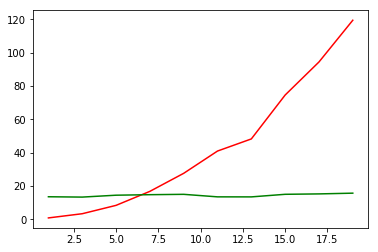

In [41]:
fig = plt.figure()

x = range(1,21,2)
plt.plot(x,noneff,c = 'red')
plt.plot(x,eff,c = 'green')

plt.show()